<a href="https://colab.research.google.com/github/ParvG2005/Parv/blob/main/Proj_Fashion_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.datasets import mnist
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
nc = 10 # Number of classes

In [2]:
(Xtrain, ytrain), (Xtest, ytest) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


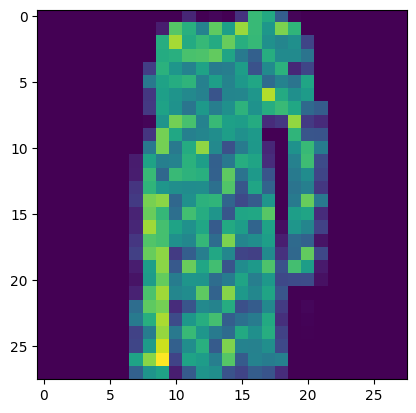

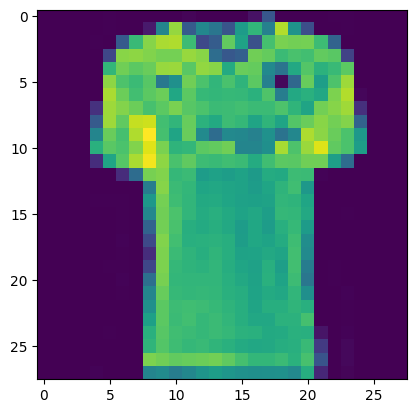

In [3]:
plt.figure(1)
imgplot1 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()
plt.figure(2)
imgplot2 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()

In [4]:
Xtrain = Xtrain.reshape(60000, 28, 28, 1)
Xtest = Xtest.reshape(10000, 28, 28, 1)
ytrainEnc = tf.one_hot(ytrain, depth = nc)
ytestEnc = tf.one_hot(ytest, depth = nc)


In [6]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.fit(Xtrain, ytrainEnc, validation_data=(Xtest, ytestEnc), epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 169s 89ms/step - accuracy: 0.7825 - loss: 1.3038 - val_accuracy: 0.8259 - val_loss: 0.4982
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 231s 105ms/step - accuracy: 0.8760 - loss: 0.3417 - val_accuracy: 0.8696 - val_loss: 0.3682
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 164s 88ms/step - accuracy: 0.8988 - loss: 0.2770 - val_accuracy: 0.8814 - val_loss: 0.3589


In [8]:
ypred = model.predict(Xtest)
ypred = np.argmax(ypred, axis=1)
score = accuracy_score(ytest, ypred)
print('score = ',100*score,'%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
score =  88.14 %
